In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from PIL import Image
import imutils
from imutils.object_detection import non_max_suppression

%matplotlib inline


##  Template Matching with Multiple Objects

image shape (715, 995)


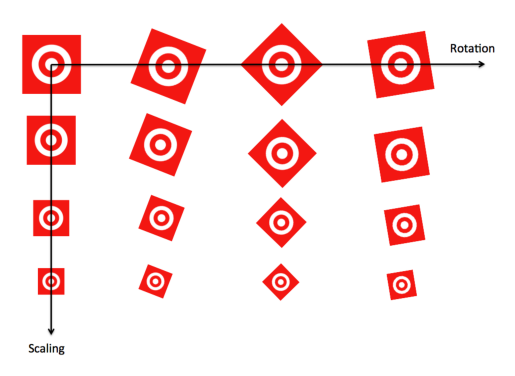

In [2]:
# load the image
image_ = cv2.imread("image_red.png")
image = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
print("image shape",image.shape)
plt.imshow(imutils.opencv2matplotlib(image_))
plt.axis("off")
plt.show()

template shape (79, 79)


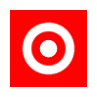

In [3]:
## Load the template image
_template = cv2.imread("template_red.png")
template = cv2.cvtColor(_template, cv2.COLOR_BGR2GRAY)
(tempH, tempW) = template.shape[:2]
print("template shape",template.shape)
plt.figure(figsize=(1,1))
plt.imshow(imutils.opencv2matplotlib(_template))
plt.axis("off")
plt.show()

## Multi-object detection with different scales and rotations

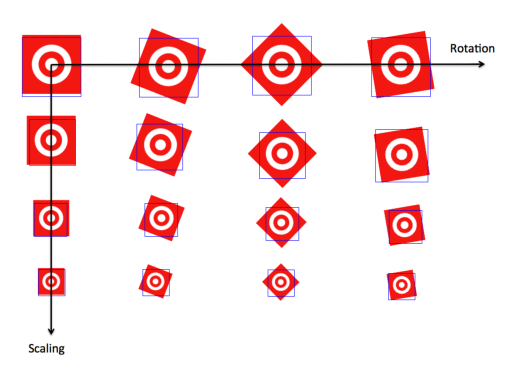

In [7]:
import imutils
# load the image
image_ = cv2.imread("image_red.png")
image = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
_template = cv2.imread("template_red.png")
template = cv2.cvtColor(_template, cv2.COLOR_BGR2GRAY)

source=image_.copy()
# initialize our list of rectangles
rects = []
for ang in [0,45,90,135,180,225,270]:

    rotated = imutils.rotate(template, angle=ang)


    for scale in np.linspace(0.5, 2, 10):

        resized= cv2.resize(rotated,dsize = (0,0), fx = scale, fy = scale)

        (tempH, tempW) = resized.shape[:2]

        results = cv2.matchTemplate(image,  resized,cv2.TM_CCOEFF_NORMED)

        # Threshold the result
        threshold = 0.5
        (ys, xs) = np.where(results >= threshold)

        for (y, x) in zip(ys, xs):
        # update our list of rectangles
          rects.append((x, y, x + tempW, y + tempH))


  # apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))

for (startX, startY, endX, endY) in pick:
      cv2.rectangle(source, (startX, startY), (endX, endY),(255, 0, 0), 1)


        #for (y, x) in zip(ys, xs):
        #zip to join x with the corresponding y
         #   cv2.rectangle(source, (x, y), (x + tempW, y + tempH), (255,0,0), 1)



plt.imshow(imutils.opencv2matplotlib(source))
plt.axis("off")
plt.show()


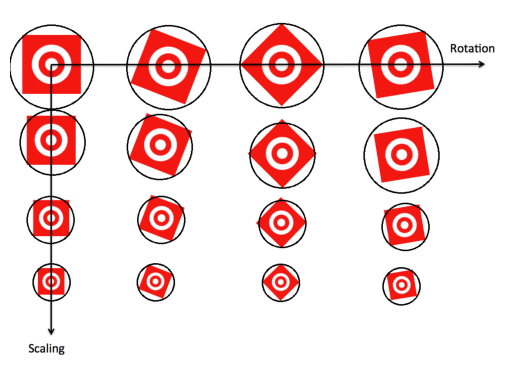

In [8]:
import imutils
# load the image
image_ = cv2.imread("image_red.png")
image = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
_template = cv2.imread("template_red.png")
template = cv2.cvtColor(_template, cv2.COLOR_BGR2GRAY)

source=image_.copy()
# initialize our list of rectangles
rects = []
for ang in [0,45,90,135,180,225,270]:

    rotated = imutils.rotate(template, angle=ang)


    for scale in np.linspace(0.5, 2, 10):

        resized= cv2.resize(rotated,dsize = (0,0), fx = scale, fy = scale)

        (tempH, tempW) = resized.shape[:2]

        results = cv2.matchTemplate(image,  resized,cv2.TM_CCOEFF_NORMED)

        # Threshold the result
        threshold = 0.5
        (ys, xs) = np.where(results >= threshold)

        for (y, x) in zip(ys, xs):
        # update our list of rectangles
          rects.append((x, y, x + tempW, y + tempH))


# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))

for (startX, startY, endX, endY) in pick:
      cx= int((endX+startX)/2)
      cy= int((endY+startY)/2)
      cv2.circle(source, (cx,cy), int((endX-startX)/2*1.43),(0, 0, 0), thickness=2)



plt.imshow(imutils.opencv2matplotlib(source))
plt.axis("off")
plt.show()
